# OPI analytics
## Mexico City's crime exploratory analysis

In [1]:
## Dependencies
import pandas as pd
import matplotlib.pyplot as plt

### A. Data collection

In [2]:
## Import data from FGJ open cases CSV file
## Reference: https://datos.cdmx.gob.mx/dataset/carpetas-de-investigacion-fgj-de-la-ciudad-de-mexico/resource/48fcb848-220c-4af0-839b-4fd8ac812c0f
FGJ_data = pd.read_csv('data/carpetas_completa_septiembre_2021.csv', low_memory=False)

### B. Data exploration

In [3]:
FGJ_data.head(3)

,ao_hechos,mes_hechos,fecha_hechos,ao_inicio,mes_inicio,fecha_inicio,delito,fiscalia,agencia,unidad_investigacion,categoria_delito,calle_hechos,calle_hechos2,colonia_hechos,alcaldia_hechos,competencia,longitud,latitud,tempo
0,2016.0,Enero,2016-01-31 22:16:00,2016,Febrero,2016-02-01 00:25:44,DAÑO EN PROPIEDAD AJENA INTENCIONAL,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-2,UI-3CD,DELITO DE BAJO IMPACTO,CALZ. DE TLALPAN,LAGO PTE.,AMÉRICAS UNIDAS,BENITO JUAREZ,NaN,-99.140215,19.380315,NaN
1,2016.0,Enero,2016-01-31 20:50:00,2016,Febrero,2016-02-01 00:52:37,ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VI...,INVESTIGACIÓN PARA LA ATENCIÓN DEL DELITO DE R...,ORIENTEII,UI-3CD,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,SUR 25 A,GRANJEROS,LOS CIPRESES,IZTAPALAPA,NaN,-99.108403,19.352859,NaN
2,2016.0,Febrero,2016-02-01 00:30:00,2016,Febrero,2016-02-01 01:33:26,NARCOMENUDEO POSESION SIMPLE,"INVESTIGACIÓN PARA LA ATENCIÓN DE NIÑOS, NIÑAS...",57,UI-3CD,DELITO DE BAJO IMPACTO,BATALLONES ROJOS,NaN,UNIDAD VICENTE GUERRERO,IZTAPALAPA,NaN,-99.061321,19.356451,NaN


In [4]:
FGJ_data.tail(3)

,ao_hechos,mes_hechos,fecha_hechos,ao_inicio,mes_inicio,fecha_inicio,delito,fiscalia,agencia,unidad_investigacion,categoria_delito,calle_hechos,calle_hechos2,colonia_hechos,alcaldia_hechos,competencia,longitud,latitud,tempo
1307208,2021.0,Septiembre,2021-09-07 20:47:00,2021,Septiembre,2021-09-30 23:54:06,DAÑO EN PROPIEDAD AJENA CULPOSA,FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN IZTAP...,IZP-6,UI-2CD,DELITO DE BAJO IMPACTO,CALZADA IGNACIO ZARAGOZA,NaN,AREA FEDERAL PARQUE ECOLOGICO EL SALADO,IZTAPALAPA,FUERO COMUN,-99.009789,19.368632,NaN
1307209,2021.0,Septiembre,2021-09-03 17:10:00,2021,Septiembre,2021-09-30 23:54:18,ROBO A REPARTIDOR CON VIOLENCIA,FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN GUSTA...,UAT-GAM-2,UI-1SD,ROBO A REPARTIDOR CON Y SIN VIOLENCIA,ZACAPOAXTLA,NaN,SAN FELIPE DE JESÚS,GUSTAVO A MADERO,FUERO COMUN,-99.069949,19.491604,NaN
1307210,2021.0,Septiembre,2021-09-30 23:20:00,2021,Septiembre,2021-09-30 23:54:45,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,FISCALÍA DE INVESTIGACIÓN TERRITORIAL EN AZCAP...,AZ-2,UI-2CD,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,CALZADA SANTIAGO AHUIZOTLA,MORELOS,SANTIAGO AHUIZOTLA,AZCAPOTZALCO,FUERO COMUN,-99.209475,19.476235,NaN


In [5]:
FGJ_data.shape

(1307211, 19)

In [6]:
FGJ_data.describe()

,ao_hechos,ao_inicio,longitud,latitud,tempo
count,1.306767e+06,1.307211e+06,1.253509e+06,1.253509e+06,0.0
mean,2.018268e+03,2.018419e+03,-9.913722e+01,1.938718e+01,NaN
std,1.914601e+00,1.612246e+00,6.000810e-02,7.006171e-02,NaN
min,1.906000e+03,2.016000e+03,-1.002319e+02,1.909535e+01,NaN
25%,2.017000e+03,2.017000e+03,-9.917561e+01,1.933937e+01,NaN
50%,2.018000e+03,2.018000e+03,-9.914208e+01,1.938967e+01,NaN
75%,2.020000e+03,2.020000e+03,-9.909959e+01,1.943776e+01,NaN
max,2.021000e+03,2.021000e+03,-9.894686e+01,1.958333e+01,NaN


In [7]:
FGJ_data.isna().any()

ao_hechos                True
mes_hechos               True
fecha_hechos             True
ao_inicio               False
mes_inicio              False
fecha_inicio             True
delito                  False
fiscalia                 True
agencia                 False
unidad_investigacion     True
categoria_delito        False
calle_hechos             True
calle_hechos2            True
colonia_hechos           True
alcaldia_hechos          True
competencia              True
longitud                 True
latitud                  True
tempo                    True
dtype: bool

In [8]:
FGJ_data.dtypes

ao_hechos               float64
mes_hechos               object
fecha_hechos             object
ao_inicio                 int64
mes_inicio               object
fecha_inicio             object
delito                   object
fiscalia                 object
agencia                  object
unidad_investigacion     object
categoria_delito         object
calle_hechos             object
calle_hechos2            object
colonia_hechos           object
alcaldia_hechos          object
competencia              object
longitud                float64
latitud                 float64
tempo                   float64
dtype: object

In [9]:
FGJ_data[['delito', 'fiscalia', 'agencia','categoria_delito','alcaldia_hechos','competencia']].nunique()

delito              345
fiscalia             73
agencia             209
categoria_delito     18
alcaldia_hechos     557
competencia           3
dtype: int64

In [10]:
FGJ_data.delito.value_counts()

VIOLENCIA FAMILIAR                                                        137582
FRAUDE                                                                     82032
ROBO DE OBJETOS                                                            75973
AMENAZAS                                                                   71595
ROBO A NEGOCIO SIN VIOLENCIA                                               67547
                                                                           ...  
ROBO DE VEHICULO Y NOMINA CON VIOLENCIA                                        1
ASOCIACION DELICTUOSA                                                          1
DESACATO                                                                       1
CALUMNIAS                                                                      1
PROCREACION ASISTIDA, INSEMINACION ARTIFICIAL Y ESTERILIZACION FORZADA         1
Name: delito, Length: 345, dtype: int64

In [11]:
FGJ_data.fiscalia.value_counts()

INVESTIGACIÓN EN IZTAPALAPA                                                                             114947
INVESTIGACIÓN EN CUAUHTEMOC                                                                             114405
INVESTIGACIÓN EN GUSTAVO A. MADERO                                                                       78355
INVESTIGACIÓN EN BENITO JUÁREZ                                                                           74528
INVESTIGACIÓN EN ÁLVARO OBREGÓN                                                                          54129
                                                                                                         ...  
FISCALÍA ESPECIALIZADA PARA LA INVESTIGACIÓN DEL DELITO DE FEMINICIDIO                                     134
UNIDAD DE RECEPCION POR INTERNET                                                                            55
ESPECIALIZADA EN LA BÚSQUEDA, LOCALIZACIÓN E INVESTIGACIÓN DE PERSONAS DESAPARECIDAS                        43
F

In [12]:
FGJ_data.categoria_delito.value_counts()

DELITO DE BAJO IMPACTO                                     1026209
ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA         73481
ROBO DE VEHÍCULO CON Y SIN VIOLENCIA                         67522
HECHO NO DELICTIVO                                           57857
ROBO A NEGOCIO CON VIOLENCIA                                 21136
ROBO A REPARTIDOR CON Y SIN VIOLENCIA                        13362
ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA        11469
LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO                 9306
HOMICIDIO DOLOSO                                              7412
VIOLACIÓN                                                     7344
ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN VIOLENCIA       4293
ROBO A CASA HABITACIÓN CON VIOLENCIA                          3256
ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON VIOLENCIA       2386
ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA                 1299
ROBO A TRANSPORTISTA CON Y SIN VIOLENCIA                      

In [13]:
FGJ_data.alcaldia_hechos.value_counts()

CUAUHTEMOC          203425
IZTAPALAPA          196158
GUSTAVO A MADERO    131319
BENITO JUAREZ       107516
ALVARO OBREGON       88946
                     ...  
ABALA                    1
MAGDALENA                1
AGUA DULCE               1
CHARO                    1
SENGUIO                  1
Name: alcaldia_hechos, Length: 557, dtype: int64

In [14]:
FGJ_data.competencia.value_counts()

FUERO COMUN           236246
HECHO NO DELICTIVO      4341
INCOMPETENCIA           2545
Name: competencia, dtype: int64

### 1. Define analysis time frame

In [15]:
## Crime incidence for the last 20 years (number of registers in FGJ db) 
year_incidence = FGJ_data.ao_hechos.value_counts()
year_incidence[year_incidence.index >= 1991].sort_index(ascending=False)

2021.0    155919
2020.0    201527
2019.0    243898
2018.0    254013
2017.0    227268
2016.0    195010
2015.0     15993
2014.0      4313
2013.0      2204
2012.0      1577
2011.0      1080
2010.0       903
2009.0       499
2008.0       482
2007.0       327
2006.0       268
2005.0       199
2004.0       169
2003.0       118
2002.0       113
2001.0       203
2000.0       112
1999.0        48
1998.0        60
1997.0        41
1996.0        31
1995.0        33
1994.0        24
1993.0        27
1992.0        35
1991.0        18
Name: ao_hechos, dtype: int64

In [29]:
FGJ_data[['ao_hechos','mes_hechos','competencia']].loc[FGJ_data['ao_hechos'] > 2000].sort_values(['ao_hechos','mes_hechos']).shape

(1306083, 3)

In [28]:
FGJ_data[['ao_hechos','mes_hechos','competencia']].loc[FGJ_data['ao_hechos'] > 2000].dropna().sort_values(['ao_hechos','mes_hechos']).shape

(242919, 3)

In [18]:
FGJ_data.loc[(FGJ_data['ao_hechos'] >= 2014) & (FGJ_data['ao_hechos'] <= 2017)].groupby(['ao_hechos','mes_hechos']).count()['delito']

ao_hechos  mes_hechos
2014.0     Abril           323
           Agosto          323
           Diciembre       426
           Enero           331
           Febrero         256
           Julio           337
           Junio           327
           Marzo           326
           Mayo            469
           Noviembre       392
           Octubre         449
           Septiembre      354
2015.0     Abril           696
           Agosto         1143
           Diciembre      3563
           Enero          1143
           Febrero         707
           Julio           946
           Junio           983
           Marzo           737
           Mayo            884
           Noviembre      2134
           Octubre        1723
           Septiembre     1334
2016.0     Abril         16413
           Agosto        16623
           Diciembre     16144
           Enero         15171
           Febrero       15505
           Julio         15477
           Junio         15260
           Marzo 

In [30]:
FGJ_data.loc[(FGJ_data['ao_inicio'] >= 2014) & (FGJ_data['ao_inicio'] <= 2017)].groupby(['ao_inicio','mes_inicio','delito']).count()['delito']

KeyError: 'delito'

In [26]:
FGJ_data.loc[(FGJ_data['ao_hechos'] >= 2014) & (FGJ_data['ao_hechos'] <= 2017)]['alcaldia_hechos'].value_counts()

CUAUHTEMOC           74079
IZTAPALAPA           64742
GUSTAVO A MADERO     43214
BENITO JUAREZ        38756
COYOACAN             30170
                     ...  
SANTIAGO DE ANAYA        1
CUITLAHUAC               1
CALVILLO                 1
CADEREYTA JIMENEZ        1
JALACINGO                1
Name: alcaldia_hechos, Length: 367, dtype: int64

### C. Clean dataset

In [84]:
print(FGJ_data.shape)

(1307211, 19)


In [42]:
FGJ_data.columns

Index(['ao_hechos', 'mes_hechos', 'fecha_hechos', 'ao_inicio', 'mes_inicio',
       'fecha_inicio', 'delito', 'fiscalia', 'agencia', 'unidad_investigacion',
       'categoria_delito', 'calle_hechos', 'calle_hechos2', 'colonia_hechos',
       'alcaldia_hechos', 'competencia', 'longitud', 'latitud', 'tempo'],
      dtype='object')

In [85]:
## Select columns for clean dataset
columns = ['ao_hechos', 'mes_hechos', 'fecha_hechos', 'delito', 'categoria_delito',
           'colonia_hechos', 'alcaldia_hechos', 'longitud', 'latitud']

## Build clean dataset according to defined analysis timeframe (2016-2021) 
FGJ_clean = FGJ_data.loc[(FGJ_data['ao_hechos'] >= 2016)][columns]
print(FGJ_clean.shape)

(1277635, 9)


In [53]:
## Convert timestamp to datetimeindex
FGJ_clean['fecha_hechos'] = pd.to_datetime(FGJ_clean.fecha_hechos.values)

In [54]:
## Set datetimeindex
FGJ_clean.set_index('fecha_hechos', inplace=True)

In [75]:
## FGJ_clean.categoria_delito.value_counts()

In [64]:
FGJ_clean.alcaldia_hechos.value_counts().head(20)

CUAUHTEMOC                195149
IZTAPALAPA                193014
GUSTAVO A MADERO          129141
BENITO JUAREZ             104641
ALVARO OBREGON             87552
COYOACAN                   85670
MIGUEL HIDALGO             82574
TLALPAN                    75262
VENUSTIANO CARRANZA        73839
AZCAPOTZALCO               62425
IZTACALCO                  53469
XOCHIMILCO                 40365
TLAHUAC                    31930
LA MAGDALENA CONTRERAS     21128
CUAJIMALPA DE MORELOS      19047
MILPA ALTA                  9408
NEZAHUALCOYOTL              1373
TLALNEPANTLA DE BAZ         1060
ECATEPEC DE MORELOS          989
NAUCALPAN DE JUAREZ          756
Name: alcaldia_hechos, dtype: int64

In [77]:
## Get alcaldias list
alcaldias_list = FGJ_clean.alcaldia_hechos.value_counts().head(16).index
alcaldias_list

Index(['CUAUHTEMOC', 'IZTAPALAPA', 'GUSTAVO A MADERO', 'BENITO JUAREZ',
       'ALVARO OBREGON', 'COYOACAN', 'MIGUEL HIDALGO', 'TLALPAN',
       'VENUSTIANO CARRANZA', 'AZCAPOTZALCO', 'IZTACALCO', 'XOCHIMILCO',
       'TLAHUAC', 'LA MAGDALENA CONTRERAS', 'CUAJIMALPA DE MORELOS',
       'MILPA ALTA'],
      dtype='object')

In [78]:
## Filter by alcaldias list
FGJ_alcaldias = FGJ_clean.loc[FGJ_clean['alcaldia_hechos'].isin(alcaldias_list)]

In [86]:
print(FGJ_alcaldias.shape)
FGJ_alcaldias.head(3)

(1264614, 8)


,ao_hechos,mes_hechos,delito,categoria_delito,colonia_hechos,alcaldia_hechos,longitud,latitud
fecha_hechos,,,,,,,,
2016-01-31 22:16:00,2016.0,Enero,DAÑO EN PROPIEDAD AJENA INTENCIONAL,DELITO DE BAJO IMPACTO,AMÉRICAS UNIDAS,BENITO JUAREZ,-99.140215,19.380315
2016-01-31 20:50:00,2016.0,Enero,ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VI...,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,LOS CIPRESES,IZTAPALAPA,-99.108403,19.352859
2016-02-01 00:30:00,2016.0,Febrero,NARCOMENUDEO POSESION SIMPLE,DELITO DE BAJO IMPACTO,UNIDAD VICENTE GUERRERO,IZTAPALAPA,-99.061321,19.356451


### 2. Increasing / decreasing crime rates

In [168]:
## Build crime list
delitos_list = FGJ_alcaldias.delito.value_counts().index

In [204]:
## Build crime rate change DF for last year
crime_rate = pd.DataFrame(delitos_list.sort_values())
crime_rate.set_index(delitos_list.sort_values(), inplace=True)
crime_rate.drop(0, axis=1, inplace=True)

crime_rate['Oct-2020'] = FGJ_alcaldias.loc[(FGJ_alcaldias.ao_hechos == 2020)&(FGJ_alcaldias.mes_hechos == 'Octubre')].delito.value_counts()
crime_rate['Sep-2021'] = FGJ_alcaldias.loc[(FGJ_alcaldias.ao_hechos == 2021)&(FGJ_alcaldias.mes_hechos == 'Septiembre')].delito.value_counts()

crime_rate.dropna(inplace=True)
crime_rate = crime_rate.loc[(crime_rate['Oct-2020'] >= 50) & (crime_rate['Sep-2021'] >= 50)]

crime_rate['Pct_Change'] = (crime_rate['Sep-2021'] - crime_rate['Oct-2020'])/crime_rate['Oct-2020']

In [207]:
## Top 5 crime increase rate
crime_rate.sort_values(['Pct_Change'], ascending=False).head(5)

,Oct-2020,Sep-2021,Pct_Change
ROBO A TRANSEUNTE EN PARQUES Y MERCADOS CON VIOLENCIA,50.0,112.0,1.240000
LESIONES INTENCIONALES POR ARMA BLANCA,73.0,106.0,0.452055
"NARCOMENUDEO POSESIÓN CON FINES DE VENTA, COMERCIO Y SUMINISTRO",104.0,150.0,0.442308
ROBO A NEGOCIO CON VIOLENCIA,166.0,223.0,0.343373
CONTRA LA INTIMIDAD SEXUAL,70.0,93.0,0.328571


In [279]:
## Top 5 crime decrease rate
crime_rate.sort_values(['Pct_Change'], ascending=False).tail(5)

,Oct-2020,Sep-2021,Pct_Change
DAÑO EN PROPIEDAD AJENA INTENCIONAL,209.0,107.0,-0.488038
ENCUBRIMIENTO,129.0,63.0,-0.511628
FRAUDE,1341.0,630.0,-0.530201
ROBO A NEGOCIO SIN VIOLENCIA,402.0,185.0,-0.539801
"PRODUCCIÓN, IMPRESIÓN, ENAJENACIÓN, DISTRIBUCIÓN, ALTERACIÓN O FALSIFICACIÓN DE TÍTULOS AL PORTADOR, DOCUMENTOS DE CRÉDITO PÚBLICOS O VALES DE CANJE",255.0,71.0,-0.721569


### 3. Crime count by Alcaldía

In [229]:
FGJ_alcaldias.groupby(['alcaldia_hechos']).count()['delito'].sort_values(ascending=False)

alcaldia_hechos
CUAUHTEMOC                195149
IZTAPALAPA                193014
GUSTAVO A MADERO          129141
BENITO JUAREZ             104641
ALVARO OBREGON             87552
COYOACAN                   85670
MIGUEL HIDALGO             82574
TLALPAN                    75262
VENUSTIANO CARRANZA        73839
AZCAPOTZALCO               62425
IZTACALCO                  53469
XOCHIMILCO                 40365
TLAHUAC                    31930
LA MAGDALENA CONTRERAS     21128
CUAJIMALPA DE MORELOS      19047
MILPA ALTA                  9408
Name: delito, dtype: int64

<AxesSubplot:ylabel='alcaldia_hechos'>

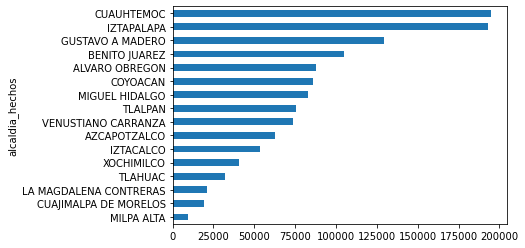

In [232]:
FGJ_alcaldias.groupby(['alcaldia_hechos']).count()['delito'].sort_values().plot(kind='barh')

### 4. Crime rate by Alcaldía

In [277]:
## Build crime rate change DF for last year
alcaldias_rate = pd.DataFrame(alcaldias_list.sort_values())
alcaldias_rate.set_index(alcaldias_list.sort_values(), inplace=True)
alcaldias_rate.drop(0, axis=1, inplace=True)

alcaldias_rate['Oct-2020'] = FGJ_alcaldias[(FGJ_alcaldias.ao_hechos == 2020)&(FGJ_alcaldias.mes_hechos == 'Octubre')].groupby(['alcaldia_hechos']).count()['delito']
alcaldias_rate['Sep-2021'] = FGJ_alcaldias[(FGJ_alcaldias.ao_hechos == 2021)&(FGJ_alcaldias.mes_hechos == 'Septiembre')].groupby(['alcaldia_hechos']).count()['delito']

alcaldias_rate['Pct_Change'] = (alcaldias_rate['Sep-2021'] - alcaldias_rate['Oct-2020'])/alcaldias_rate['Oct-2020']

In [278]:
alcaldias_rate

,Oct-2020,Sep-2021,Pct_Change
ALVARO OBREGON,1385,953,-0.311913
AZCAPOTZALCO,990,818,-0.173737
BENITO JUAREZ,1333,945,-0.291073
COYOACAN,1250,983,-0.213600
CUAJIMALPA DE MORELOS,362,193,-0.466851
CUAUHTEMOC,2511,1959,-0.219833
GUSTAVO A MADERO,1934,1584,-0.180972
IZTACALCO,748,592,-0.208556
IZTAPALAPA,2813,2060,-0.267686
LA MAGDALENA CONTRERAS,397,264,-0.335013


In [282]:
## Top 5 crime increase rate (least decrease rate)
alcaldias_rate.sort_values(['Pct_Change'], ascending=False).head(5)

,Oct-2020,Sep-2021,Pct_Change
VENUSTIANO CARRANZA,978,869,-0.111452
MILPA ALTA,192,162,-0.156250
AZCAPOTZALCO,990,818,-0.173737
GUSTAVO A MADERO,1934,1584,-0.180972
IZTACALCO,748,592,-0.208556


In [283]:
## Top 5 crime decrease rate
alcaldias_rate.sort_values(['Pct_Change'], ascending=False).tail(5)

,Oct-2020,Sep-2021,Pct_Change
BENITO JUAREZ,1333,945,-0.291073
XOCHIMILCO,626,438,-0.300319
ALVARO OBREGON,1385,953,-0.311913
LA MAGDALENA CONTRERAS,397,264,-0.335013
CUAJIMALPA DE MORELOS,362,193,-0.466851


<AxesSubplot:>

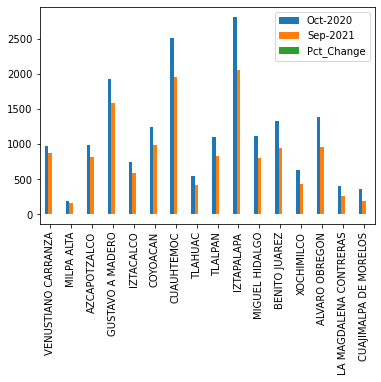

In [291]:
alcaldias_rate.sort_values(['Pct_Change'], ascending=False).plot(kind='bar')

### 5. Distinctive crimes by Alcaldía

In [210]:
FGJ_alcaldias.groupby(['delito', pd.Grouper(freq='m')]).count()['ao_hechos']

delito               fecha_hechos
ABANDONO DE PERSONA  2016-01-31        34
                     2016-02-29        47
                     2016-03-31        40
                     2016-04-30        46
                     2016-05-31        52
                                     ... 
VIOLENCIA FAMILIAR   2021-05-31      3142
                     2021-06-30      2753
                     2021-07-31      2706
                     2021-08-31      2577
                     2021-09-30      2162
Name: ao_hechos, Length: 14423, dtype: int64